# Classify Fashion-MNIST with a simple CNN in Keras

## Download the fashion_mnist data

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot  as plt

# Loding the fashion-mnist pre-shuffled training data and testing data
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("X_train Shape : {} Y_train Shape : {}".format(x_train.shape,y_train.shape))

X_train Shape : (60000, 28, 28) Y_train Shape : (60000,)


### Visualize the data

y = 1 Trouser


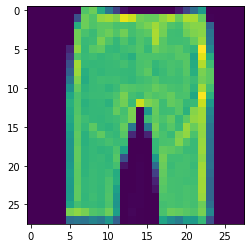

In [2]:
import random

# Show one of the images from the training dataset
img_index = random.randrange(0,60000)

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

label_index = y_train[img_index]

print ("y = " + str(label_index) + " " + (fashion_mnist_labels[label_index]))

plt.imshow(x_train[img_index])

### Data Normalization

In [3]:
# Do normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Split the data into train / validation / test data sets
* Training data - used for training the model
* Validation data - used for tuning the hyperparameters and evaluate the models
* Test data - used to test the model after the model has gone through initial vetting by the validation set.

In [4]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## CNN Modeling
#### 2 Convolutional Layer, 2 Pooling Layer, 1 Dropout Layer

In [5]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu',input_shape = (28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.3))

## The second stratum
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.3))

## The Last layer for classification, using Softmax function to do this
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [6]:
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

### Model compile
Configure the learning process with compile() API before training the model. It receives three arguments:

* An optimizer
* A loss function
* A list of metrics

In [7]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

### Model Training
Now let's train the model with **fit() API**.

We use the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. **Set "save_best_only = True"** to save only when the validation accuracy improves.

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

model.fit(x_train,y_train,
         batch_size = 64, epochs = 20, validation_data = (x_valid,y_valid),
         callbacks = [checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
54976/55000 [============================>.] - ETA: 0s - loss: 0.5603 - accuracy: 0.7934
Epoch 00001: val_loss improved from inf to 0.34912, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 25s 450us/sample - loss: 0.5603 - accuracy: 0.7934 - val_loss: 0.3491 - val_accuracy: 0.8752
Epoch 2/20
54976/55000 [============================>.] - ETA: 0s - loss: 0.3846 - accuracy: 0.8600
Epoch 00002: val_loss improved from 0.34912 to 0.30580, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 24s 437us/sample - loss: 0.3846 - accuracy: 0.8600 - val_loss: 0.3058 - val_accuracy: 0.8916
Epoch 3/20
54976/55000 [============================>.] - ETA: 0s - loss: 0.3434 - accuracy: 0.8754
Epoch 00003: val_loss improved from 0.30580 to 0.27548, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 25s 451us/sample - loss: 0.3434 - accura

#### Load the weights with the best validation accuracy

In [9]:
model.load_weights('model.weights.best.hdf5')

#### Test Accuracy

In [10]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.924


## Visualize prediction

Now let's visualize the prediction using the model we just trained. First we get the predictions with the model from the test data. Then we **print out 15 images from the test data set**, and set the titles with the prediction (and the groud truth label). If the prediction **matches the true label, the title will be green; otherwise it's displayed in red.**

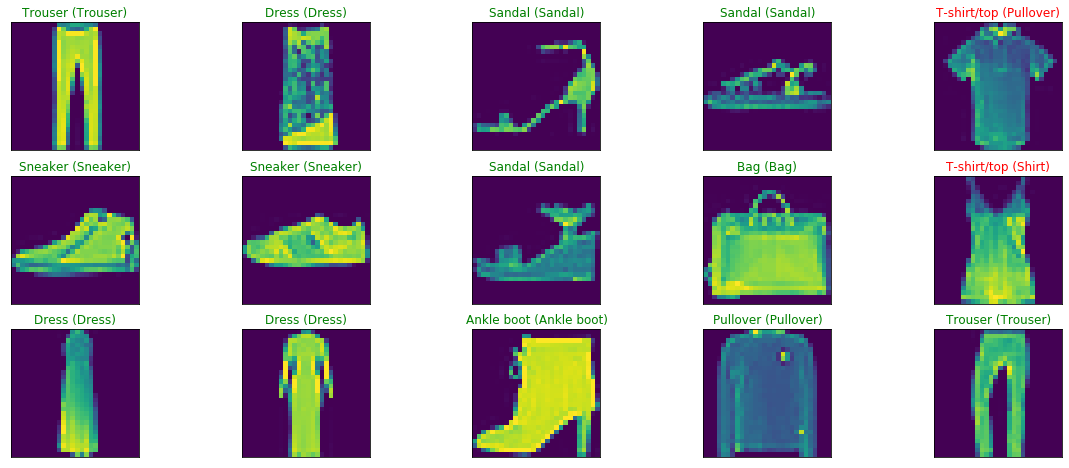

In [11]:
y_hat = model.predict(x_test)

# plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize = (20,8))

for i,index in enumerate(np.random.choice(x_test.shape[0],size = 15, replace = False)):
    ax = figure.add_subplot(3, 5, i+1, xticks = [], yticks = [])
    
    # Display each sectors
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))